In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns',None)

2024-04-04 12:02:11.422021: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 12:02:11.470074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 12:02:12.219183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


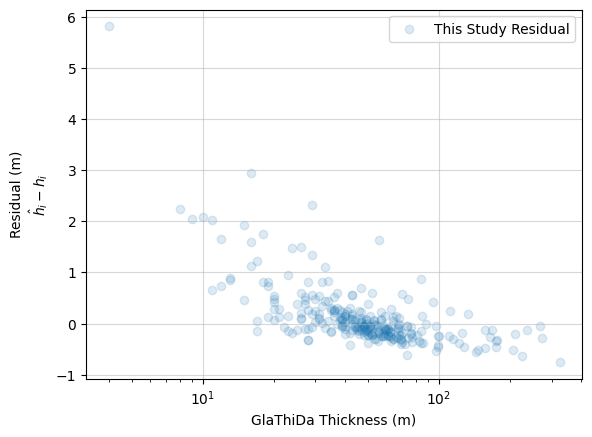

In [2]:
E_delta_a, areas, cols, train = gl.load_LOO_data(include_train = True)
x = train['Thickness']
y = np.mean(train[cols],axis = 1)
z = train['FMT']
plt.scatter(
    x,(y-x)/x,alpha = 0.15,label = 'This Study Residual'
)
# plt.scatter(
#     x,(z-x)/x,alpha = 0.15,label = 'Farinotti et al. Residual'
# )
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)\n$\hat{h}_i - h_i$')
plt.legend()
# plt.yscale('symlog')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()


In [3]:
train = pd.concat([train,pd.Series(y-x,name = 'r')],axis = 1)

In [4]:
train

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,perc smaller,size difference,SURVEY_DATE,Area_GlaThiDa,BgnDate_x,distance test,YearsBetween,CR,GLIMSId,BgnDate_y,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,Area_unc_0,Area_unc_1,Area_unc_2,Area_unc_3,Area_unc_4,Area_unc_5,Area_unc_6,Area_unc_7,Area_unc_8,Area_unc_9,Area_unc_10,Area_unc_11,Area_unc_12,Area_unc_13,Area_unc_14,Area_unc_15,Area_unc_16,Area_unc_17,Area_unc_18,Area_unc_19,Area_unc_20,Area_unc_21,Area_unc_22,Area_unc_23,Area_unc_24,Area_unc_25,Area_unc_26,Area_unc_27,Area_unc_28,Area_unc_29,Area_unc_30,Area_unc_31,Area_unc_32,Area_unc_33,Area_unc_34,Area_unc_35,Area_unc_36,Area_unc_37,Area_unc_38,Area_unc_39,Area_unc_40,Area_unc_41,Area_unc_42,Area_unc_43,Area_unc_44,Area_unc_45,Area_unc_46,Area_unc_47,Area_unc_48,Area_unc_49,Area_unc_50,Area_unc_51,Area_unc_52,Area_unc_53,Area_unc_54,Area_unc_55,Area_unc_56,Area_unc_57,Area_unc_58,Area_unc_59,Area_unc_60,Area_unc_61,Area_unc_62,Area_unc_63,Area_unc_64,Area_unc_65,Area_unc_66,Area_unc_67,Area_unc_68,Area_unc_69,Area_unc_70,Area_unc_71,Area_unc_72,Area_unc_73,Area_unc_74,Area_unc_75,Area_unc_76,Area_unc_77,Area_unc_78,Area_unc_79,Area_unc_80,Area_unc_81,Area_unc_82,Area_unc_83,Area_unc_84,Area_unc_85,Area_unc_86,Area_unc_87,Area_unc_88,Area_unc_89,Area_unc_90,Area_unc_91,Area_unc_92,Area_unc_93,Area_unc_94,Area_unc_95,Area_unc_96,Area_unc_97,Area_unc_98,Area_unc_99,Area_unc_100,Area_unc_101,Area_unc_102,Area_unc_103,Area_unc_104,Area_unc_105,Area_unc_106,Area_unc_107,Area_unc_108,Area_unc_109,Area_unc_110,Area_unc_111,Area_unc_112,Area_unc_113,Area_unc_114,Area_unc_115,Area_unc_116,Area_unc_117,Area_unc_118,Area_unc_119,Area_unc_120,Area_unc_121,Area_unc_122,Area_unc_123,Area_unc_124,Area_unc_125,Area_unc_126,Area_unc_127,Area_unc_128,Area_unc_129,Area_unc_130,Area_unc_131,Area_unc_132,Area_unc_133,Area_unc_134,Area_unc_135,Area_unc_136,Area_unc_137,Area_unc_138,Area_unc_139,Area_unc_140,Area_unc_141,Area_unc_142,Area_unc_143,Area_unc_144,Area_unc_145,Area_unc_146,Area_unc_147,Area_unc_148,Area_unc_149,Area_unc_150,Area_unc_151,Area_unc_152,Area_unc_153,Area_unc_154,Area_unc_155,Area_unc_156,Area_unc_157,Area_unc_158,Area_unc_159,Area_unc_160,Area_unc_161,Area_unc_162,Area_unc_163,Area_unc_164,Area_unc_165,Area_unc_166,Area_unc_167,Area_unc_168,Area_unc_169,Area_unc_170,Area_unc_171,Area_unc_172,Area_unc_173,Area_unc_174,Area_unc_175,Area_unc_176,Area_unc_177,Area_unc_178,Area_unc_179,Area_unc_180,Area_unc_181,Area_unc_182,Area_unc_183,Area_unc_184,Area_unc_185,Area_unc_186,Area_unc_187,Area_unc_188,Area_unc_189,Area_unc_190,Area_unc_191,Area_unc_192,Area_unc_193,Area_unc_194,Area_unc_195,Area_unc_196,Area_unc_197,Area_unc_198,Area_unc_199,Area_unc_200,Area_unc_201,Area_unc_202,Area_unc_203,Area_unc_204,Area_unc_205,Area_unc_206,Area_unc_207,Area_unc_208,Area_unc_209,Area_unc_210,Area_unc_211,Area_unc_212,Area_unc_213,Area_unc_214,Area_unc_215,Area_unc_216,Area_unc_217,Area_unc_218,Area_unc_21

In [5]:
train[train['TermType'] == 5]

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,perc smaller,size difference,SURVEY_DATE,Area_GlaThiDa,BgnDate_x,distance test,YearsBetween,CR,GLIMSId,BgnDate_y,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,Area_unc_0,Area_unc_1,Area_unc_2,Area_unc_3,Area_unc_4,Area_unc_5,Area_unc_6,Area_unc_7,Area_unc_8,Area_unc_9,Area_unc_10,Area_unc_11,Area_unc_12,Area_unc_13,Area_unc_14,Area_unc_15,Area_unc_16,Area_unc_17,Area_unc_18,Area_unc_19,Area_unc_20,Area_unc_21,Area_unc_22,Area_unc_23,Area_unc_24,Area_unc_25,Area_unc_26,Area_unc_27,Area_unc_28,Area_unc_29,Area_unc_30,Area_unc_31,Area_unc_32,Area_unc_33,Area_unc_34,Area_unc_35,Area_unc_36,Area_unc_37,Area_unc_38,Area_unc_39,Area_unc_40,Area_unc_41,Area_unc_42,Area_unc_43,Area_unc_44,Area_unc_45,Area_unc_46,Area_unc_47,Area_unc_48,Area_unc_49,Area_unc_50,Area_unc_51,Area_unc_52,Area_unc_53,Area_unc_54,Area_unc_55,Area_unc_56,Area_unc_57,Area_unc_58,Area_unc_59,Area_unc_60,Area_unc_61,Area_unc_62,Area_unc_63,Area_unc_64,Area_unc_65,Area_unc_66,Area_unc_67,Area_unc_68,Area_unc_69,Area_unc_70,Area_unc_71,Area_unc_72,Area_unc_73,Area_unc_74,Area_unc_75,Area_unc_76,Area_unc_77,Area_unc_78,Area_unc_79,Area_unc_80,Area_unc_81,Area_unc_82,Area_unc_83,Area_unc_84,Area_unc_85,Area_unc_86,Area_unc_87,Area_unc_88,Area_unc_89,Area_unc_90,Area_unc_91,Area_unc_92,Area_unc_93,Area_unc_94,Area_unc_95,Area_unc_96,Area_unc_97,Area_unc_98,Area_unc_99,Area_unc_100,Area_unc_101,Area_unc_102,Area_unc_103,Area_unc_104,Area_unc_105,Area_unc_106,Area_unc_107,Area_unc_108,Area_unc_109,Area_unc_110,Area_unc_111,Area_unc_112,Area_unc_113,Area_unc_114,Area_unc_115,Area_unc_116,Area_unc_117,Area_unc_118,Area_unc_119,Area_unc_120,Area_unc_121,Area_unc_122,Area_unc_123,Area_unc_124,Area_unc_125,Area_unc_126,Area_unc_127,Area_unc_128,Area_unc_129,Area_unc_130,Area_unc_131,Area_unc_132,Area_unc_133,Area_unc_134,Area_unc_135,Area_unc_136,Area_unc_137,Area_unc_138,Area_unc_139,Area_unc_140,Area_unc_141,Area_unc_142,Area_unc_143,Area_unc_144,Area_unc_145,Area_unc_146,Area_unc_147,Area_unc_148,Area_unc_149,Area_unc_150,Area_unc_151,Area_unc_152,Area_unc_153,Area_unc_154,Area_unc_155,Area_unc_156,Area_unc_157,Area_unc_158,Area_unc_159,Area_unc_160,Area_unc_161,Area_unc_162,Area_unc_163,Area_unc_164,Area_unc_165,Area_unc_166,Area_unc_167,Area_unc_168,Area_unc_169,Area_unc_170,Area_unc_171,Area_unc_172,Area_unc_173,Area_unc_174,Area_unc_175,Area_unc_176,Area_unc_177,Area_unc_178,Area_unc_179,Area_unc_180,Area_unc_181,Area_unc_182,Area_unc_183,Area_unc_184,Area_unc_185,Area_unc_186,Area_unc_187,Area_unc_188,Area_unc_189,Area_unc_190,Area_unc_191,Area_unc_192,Area_unc_193,Area_unc_194,Area_unc_195,Area_unc_196,Area_unc_197,Area_unc_198,Area_unc_199,Area_unc_200,Area_unc_201,Area_unc_202,Area_unc_203,Area_unc_204,Area_unc_205,Area_unc_206,Area_unc_207,Area_unc_208,Area_unc_209,Area_unc_210,Area_unc_211,Area_unc_212,Area_unc_213,Area_unc_214,Area_unc_215,Area_unc_216,Area_unc_217,Area_unc_218,Area_unc_21

In [6]:
train[train['Form'] == 1]

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,perc smaller,size difference,SURVEY_DATE,Area_GlaThiDa,BgnDate_x,distance test,YearsBetween,CR,GLIMSId,BgnDate_y,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,Area_unc_0,Area_unc_1,Area_unc_2,Area_unc_3,Area_unc_4,Area_unc_5,Area_unc_6,Area_unc_7,Area_unc_8,Area_unc_9,Area_unc_10,Area_unc_11,Area_unc_12,Area_unc_13,Area_unc_14,Area_unc_15,Area_unc_16,Area_unc_17,Area_unc_18,Area_unc_19,Area_unc_20,Area_unc_21,Area_unc_22,Area_unc_23,Area_unc_24,Area_unc_25,Area_unc_26,Area_unc_27,Area_unc_28,Area_unc_29,Area_unc_30,Area_unc_31,Area_unc_32,Area_unc_33,Area_unc_34,Area_unc_35,Area_unc_36,Area_unc_37,Area_unc_38,Area_unc_39,Area_unc_40,Area_unc_41,Area_unc_42,Area_unc_43,Area_unc_44,Area_unc_45,Area_unc_46,Area_unc_47,Area_unc_48,Area_unc_49,Area_unc_50,Area_unc_51,Area_unc_52,Area_unc_53,Area_unc_54,Area_unc_55,Area_unc_56,Area_unc_57,Area_unc_58,Area_unc_59,Area_unc_60,Area_unc_61,Area_unc_62,Area_unc_63,Area_unc_64,Area_unc_65,Area_unc_66,Area_unc_67,Area_unc_68,Area_unc_69,Area_unc_70,Area_unc_71,Area_unc_72,Area_unc_73,Area_unc_74,Area_unc_75,Area_unc_76,Area_unc_77,Area_unc_78,Area_unc_79,Area_unc_80,Area_unc_81,Area_unc_82,Area_unc_83,Area_unc_84,Area_unc_85,Area_unc_86,Area_unc_87,Area_unc_88,Area_unc_89,Area_unc_90,Area_unc_91,Area_unc_92,Area_unc_93,Area_unc_94,Area_unc_95,Area_unc_96,Area_unc_97,Area_unc_98,Area_unc_99,Area_unc_100,Area_unc_101,Area_unc_102,Area_unc_103,Area_unc_104,Area_unc_105,Area_unc_106,Area_unc_107,Area_unc_108,Area_unc_109,Area_unc_110,Area_unc_111,Area_unc_112,Area_unc_113,Area_unc_114,Area_unc_115,Area_unc_116,Area_unc_117,Area_unc_118,Area_unc_119,Area_unc_120,Area_unc_121,Area_unc_122,Area_unc_123,Area_unc_124,Area_unc_125,Area_unc_126,Area_unc_127,Area_unc_128,Area_unc_129,Area_unc_130,Area_unc_131,Area_unc_132,Area_unc_133,Area_unc_134,Area_unc_135,Area_unc_136,Area_unc_137,Area_unc_138,Area_unc_139,Area_unc_140,Area_unc_141,Area_unc_142,Area_unc_143,Area_unc_144,Area_unc_145,Area_unc_146,Area_unc_147,Area_unc_148,Area_unc_149,Area_unc_150,Area_unc_151,Area_unc_152,Area_unc_153,Area_unc_154,Area_unc_155,Area_unc_156,Area_unc_157,Area_unc_158,Area_unc_159,Area_unc_160,Area_unc_161,Area_unc_162,Area_unc_163,Area_unc_164,Area_unc_165,Area_unc_166,Area_unc_167,Area_unc_168,Area_unc_169,Area_unc_170,Area_unc_171,Area_unc_172,Area_unc_173,Area_unc_174,Area_unc_175,Area_unc_176,Area_unc_177,Area_unc_178,Area_unc_179,Area_unc_180,Area_unc_181,Area_unc_182,Area_unc_183,Area_unc_184,Area_unc_185,Area_unc_186,Area_unc_187,Area_unc_188,Area_unc_189,Area_unc_190,Area_unc_191,Area_unc_192,Area_unc_193,Area_unc_194,Area_unc_195,Area_unc_196,Area_unc_197,Area_unc_198,Area_unc_199,Area_unc_200,Area_unc_201,Area_unc_202,Area_unc_203,Area_unc_204,Area_unc_205,Area_unc_206,Area_unc_207,Area_unc_208,Area_unc_209,Area_unc_210,Area_unc_211,Area_unc_212,Area_unc_213,Area_unc_214,Area_unc_215,Area_unc_216,Area_unc_217,Area_unc_218,Area_unc_21

In [7]:
glacs = train[train['Form'] == 0]
caps = train[train['Form'] == 1]

Text(0.5, 1.0, 'Residuals With GlaThiDa')

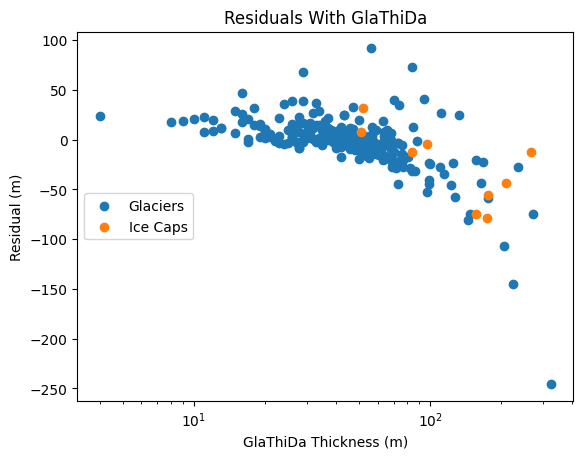

In [8]:
plt.scatter(glacs['Thickness'],glacs['r'],label = 'Glaciers')
plt.scatter(caps['Thickness'],caps['r'],label = 'Ice Caps')
plt.ylabel('Residual (m)')
plt.xlabel('GlaThiDa Thickness (m)')
plt.xscale('log')
plt.legend(loc = 'center left')
plt.title('Residuals With GlaThiDa')

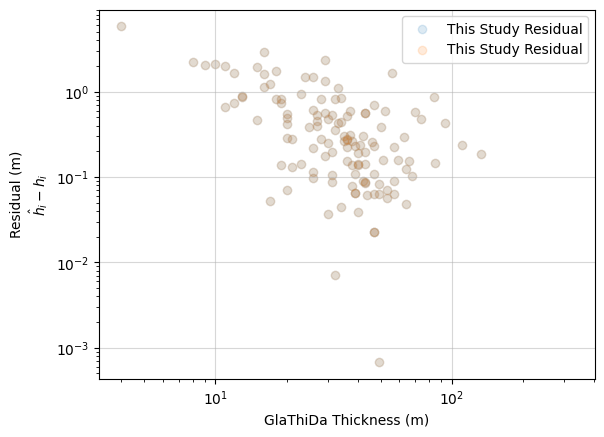

In [9]:
E_delta_a, areas, cols, train = gl.load_LOO_data(include_train = True)

x = train['Thickness']
y = np.mean(train[cols],axis = 1)
z = train['FMT']
plt.scatter(
    x,((y-x)/x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,((y-x)/x),alpha = 0.15,label = 'This Study Residual'
)
# plt.scatter(
#     x,(z-x)/x,alpha = 0.15,label = 'Farinotti et al. Residual'
# )
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)\n$\hat{h}_i - h_i$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()


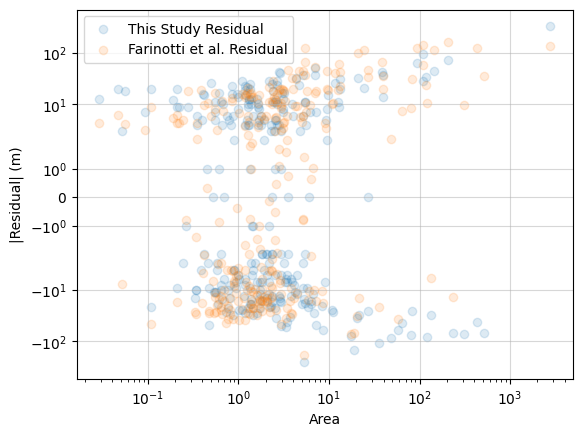

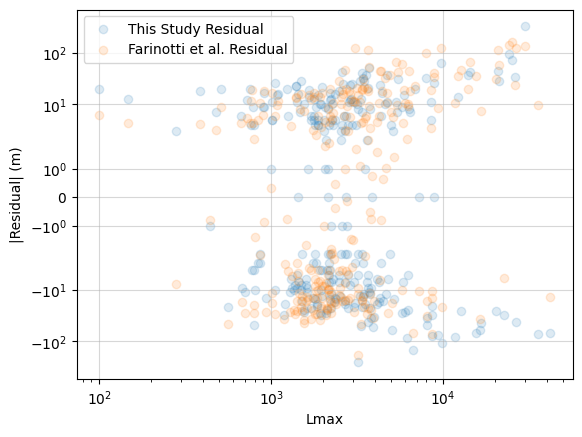

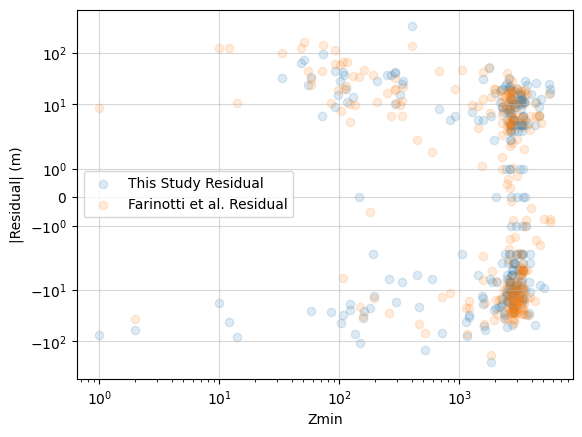

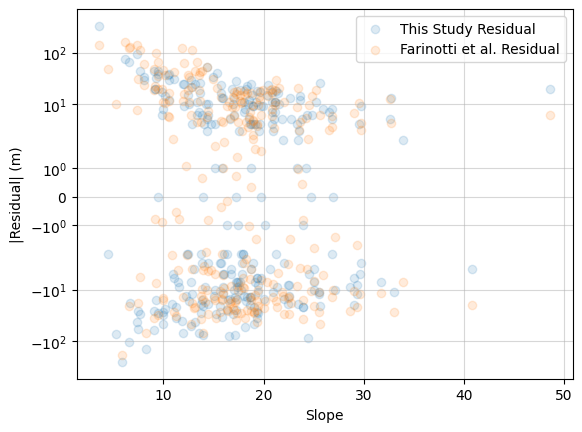

In [10]:
feat_list = ['Area','Lmax','Zmin','Slope']
for i in feat_list:
    
    x = train['Thickness']
    y = np.diagonal(train[cols])
    z = train['FMT']
    plt.scatter(
        train[i],(y-x),alpha = 0.15,label = 'This Study Residual'
    )
    plt.scatter(
        train[i],(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
    )
    plt.ylabel('|Residual| (m)')
    plt.legend()
    plt.yscale('symlog')
    if i != 'Slope':
        plt.xscale('log')
    plt.xlabel(i)

    plt.grid(alpha = 0.5)
    plt.show()
